In [2]:
import pandas as pd
import configparser
import numpy as np
from datetime import datetime
import dateutil.relativedelta
from matplotlib import pyplot as plt
#%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import os
import pickle


from scipy import stats

# Regular expressions
import re

# seaborn : advanced visualization
import seaborn as sns
print('seaborn version\t:',sns.__version__)

pd.options.mode.chained_assignment = None #set it to None to remove SettingWithCopyWarning
pd.options.display.float_format = '{:.2f}'.format #set it to convert scientific noations such as 4.225108e+11 to 422510842796.00
pd.set_option('display.max_columns', None) # to display all the columns
pd.set_option('display.max_rows', None) # to display all the columns

np.set_printoptions(suppress=True,formatter={'float_kind':'{:f}'.format})


seaborn version	: 0.9.0


In [255]:
dress_df = pd.read_csv('D:\Collections\Adhoc\Dress.csv')
dress_df.shape
dress_df.info()
dress_df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Dress_ID        500 non-null    int64  
 1   Style           500 non-null    object 
 2   Price           498 non-null    object 
 3   Rating          500 non-null    float64
 4   Size            500 non-null    object 
 5   Season          498 non-null    object 
 6   NeckLine        497 non-null    object 
 7   SleeveLength    498 non-null    object 
 8   waiseline       413 non-null    object 
 9   Material        372 non-null    object 
 10  FabricType      234 non-null    object 
 11  Decoration      264 non-null    object 
 12  Pattern Type    391 non-null    object 
 13  Recommendation  500 non-null    int64  
dtypes: float64(1), int64(2), object(11)
memory usage: 54.8+ KB


,Dress_ID,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,waiseline,Material,FabricType,Decoration,Pattern Type,Recommendation
count,500.00,500,498,500.00,500,498,497,498,413,372,234,264,391,500.00
unique,nan,13,7,nan,7,8,16,17,4,23,22,24,14,nan
top,nan,Casual,Average,nan,M,Summer,o-neck,sleevless,natural,cotton,chiffon,lace,solid,nan
freq,nan,232,252,nan,177,159,271,223,304,152,135,70,203,nan
mean,905541681.05,NaN,NaN,3.53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.42
std,173618960.65,NaN,NaN,2.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.49
min,444282011.00,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
25%,767316420.00,NaN,NaN,3.70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
50%,908329553.00,NaN,NaN,4.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
75%,1039533963.50,NaN,NaN,4.80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00


## EDA on Numerical variables

<AxesSubplot:>

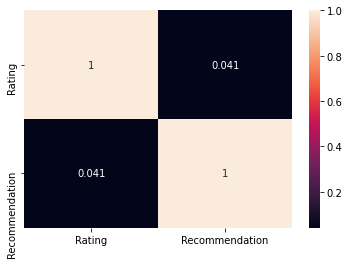

In [256]:
#### Checking Correlation using Pearson
sns.heatmap(dress_df.drop(columns='Dress_ID').corr(method="pearson"),annot=True)
#### Checking Correlation using Spearman


<AxesSubplot:>

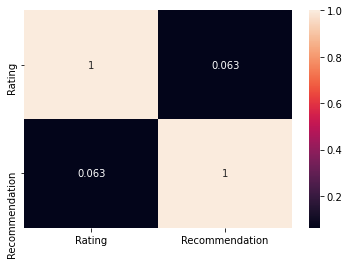

In [257]:
sns.heatmap(dress_df.drop(columns='Dress_ID').corr(method="spearman"),annot=True)
## Rating  is not corelated to Recomendation

<AxesSubplot:xlabel='Recommendation', ylabel='Rating'>

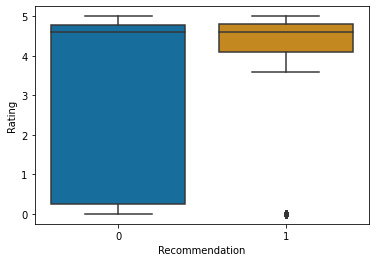

In [258]:
## Checking relation wih Target Recommendation
sns.boxplot(x='Recommendation',y='Rating', 
                 data=dress_df, 
                 palette="colorblind"
                 )
## Higher ratings are more related Good Recommendation (1)

<AxesSubplot:xlabel='Rating'>

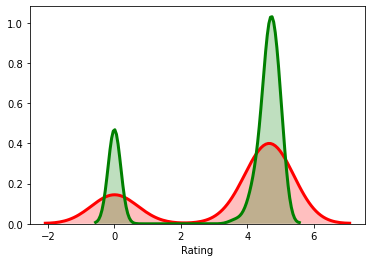

In [259]:
x1 = dress_df.loc[dress_df.Recommendation == 1, 'Rating']
x0 = dress_df.loc[dress_df.Recommendation == 0, 'Rating']

sns.distplot(x0, hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3},color='red')
sns.distplot(x1, hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3},color='green')
## More concentration of Good Recommendation towards higher rating

## EDA on Catagorical variables

In [260]:
dress_df_copy.Rating.value_counts()

0.00    120
4.70     84
4.80     57
5.00     55
4.60     54
4.50     34
4.40     27
4.90     25
4.30     20
4.00      7
4.20      6
4.10      5
3.70      2
3.60      1
3.00      1
1.00      1
3.50      1
Name: Rating, dtype: int64

In [261]:
## EDA for Rating
dress_df.loc[dress_df.Rating.between(0,3.5),'Rating_bin'] = '0-3.5'
#dress_df.loc[dress_df.Rating.between(3.01,3.5),'Rating_bin'] = '3-3.5'
dress_df.loc[dress_df.Rating.between(3.51,4.5),'Rating_bin'] = '3.5-4.5'
#dress_df.loc[dress_df.Rating.between(4.01,4.5),'Rating_bin'] = '4.0-4.5'
dress_df.loc[dress_df.Rating.between(4.51,5),'Rating_bin'] = '4.5-5'
dress_df.Rating_bin.value_counts(dropna=False)

4.5-5      275
0-3.5      123
3.5-4.5    102
Name: Rating_bin, dtype: int64

<AxesSubplot:label='b0ffe636-c146-4776-9380-5980c2b95702'>

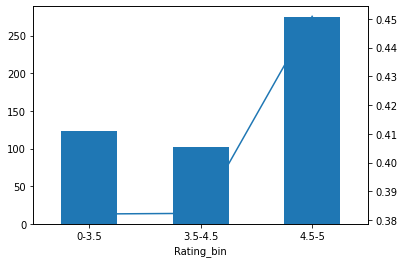

In [262]:
ax = dress_df.groupby(['Rating_bin']).Recommendation.count().plot(kind='bar')
dress_df.groupby(['Rating_bin']).apply(lambda x: x.Recommendation.sum()/x.Recommendation.count()).plot(kind='line',secondary_y = True, ax = ax)
## Recommendation are high for  Other Rating_bins

In [263]:
dress_df.columns
## EDA for Price
dress_df.loc[dress_df.Price=='low','Price'] = 'Low'
dress_df.loc[dress_df.Price=='high','Price'] = 'High'
dress_df.loc[dress_df.Price=='very-high','Price'] = 'High'
dress_df.Price.fillna(dress_df.Price.value_counts().index[0],inplace=True)
dress_df.Price.value_counts(dropna=False)





Average    254
Low        174
High        42
Medium      30
Name: Price, dtype: int64

In [264]:
##  EDA for  Pattern Type
freqs=dress_df['Pattern Type'].value_counts(dropna=False)
selected_cats=freqs.index[freqs<45]
for cat in selected_cats:
        dress_df.loc[dress_df['Pattern Type']== cat,'Pattern Type'] = 'other'
dress_df['Pattern Type'].fillna('other',inplace=True)        
dress_df['Pattern Type'].value_counts(dropna=False)

solid        203
other        178
print         71
patchwork     48
Name: Pattern Type, dtype: int64

<AxesSubplot:label='fcdac80c-baa2-49c5-b268-0bcfb140c569'>

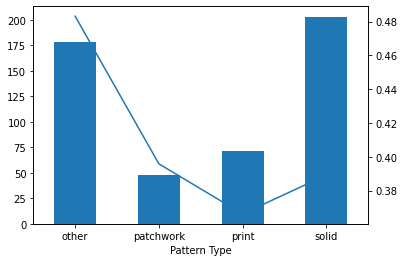

In [265]:
ax = dress_df.groupby(['Pattern Type']).Recommendation.count().plot(kind='bar')
dress_df.groupby(['Pattern Type']).apply(lambda x: x.Recommendation.sum()/x.Recommendation.count()).plot(kind='line',secondary_y = True, ax = ax)
## Recommendation are high for  Other Pattern Types

Text(0, 0.5, 'Frequency of Pattern')

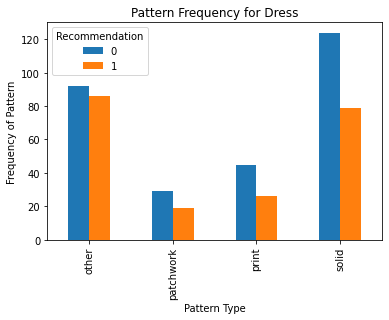

In [266]:
pd.crosstab(dress_df['Pattern Type'],dress_df.Recommendation).plot(kind='bar')
plt.title('Pattern Frequency for Dress')
plt.xlabel('Pattern Type')

plt.ylabel('Frequency of Pattern')


In [267]:
dress_df.Decoration.value_counts(dropna=False)
## Removing Fabric Type as NULL are around 50%
dress_df.drop(columns='Decoration',inplace=True)

In [268]:
dress_df.FabricType.value_counts(dropna=False)
## Removing Fabric Type as NULL are more than 50%
dress_df.drop(columns='FabricType',inplace=True)

In [269]:
##  EDA for  Material
freqs=dress_df.Material.value_counts(dropna=False)
selected_cats=freqs.index[freqs<50]
for cat in selected_cats:
        dress_df.loc[dress_df.Material== cat,'Material'] = 'other'
dress_df.Material.fillna('other',inplace=True)        
dress_df.Material.value_counts(dropna=False)

other       249
cotton      152
polyster     99
Name: Material, dtype: int64

<AxesSubplot:label='0ba3f135-3b10-4553-811b-0629f0a315c6'>

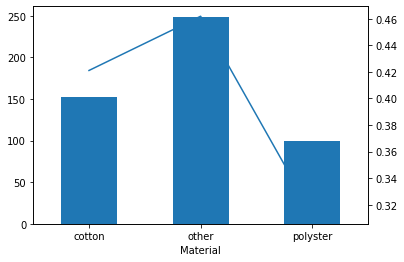

In [270]:
ax = dress_df.groupby(['Material']).Recommendation.count().plot(kind='bar')
dress_df.groupby(['Material']).apply(lambda x: x.Recommendation.sum()/x.Recommendation.count()).plot(kind='line',secondary_y = True, ax = ax)
## Recommendation are high for other and cotton Materials

Text(0, 0.5, 'Frequency of Material')

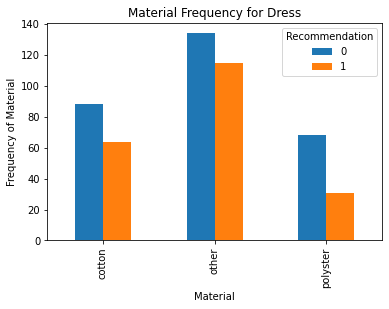

In [271]:
pd.crosstab(dress_df['Material'],dress_df.Recommendation).plot(kind='bar')
plt.title('Material Frequency for Dress')
plt.xlabel('Material')
plt.ylabel('Frequency of Material')


In [272]:
##  EDA for  waiseline
freqs=dress_df.waiseline.value_counts(dropna=False)
selected_cats=freqs.index[freqs<50]
for cat in selected_cats:
        dress_df.loc[dress_df.waiseline== cat,'waiseline'] = 'other'
dress_df.waiseline.fillna('other',inplace=True)        
dress_df.waiseline.value_counts(dropna=False)

natural    304
empire     104
other       92
Name: waiseline, dtype: int64

<AxesSubplot:label='7fa8d7b7-f079-4ba9-82d8-67d292924822'>

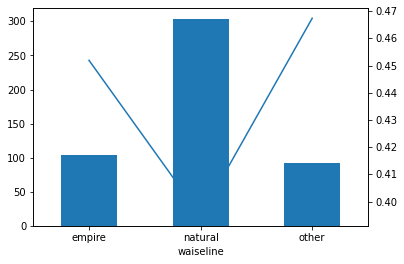

In [273]:
ax = dress_df.groupby(['waiseline']).Recommendation.count().plot(kind='bar')
dress_df.groupby(['waiseline']).apply(lambda x: x.Recommendation.sum()/x.Recommendation.count()).plot(kind='line',secondary_y = True, ax = ax)
## Recommendation are high for other and Empire waist line

Text(0, 0.5, 'Frequency of Waisline')

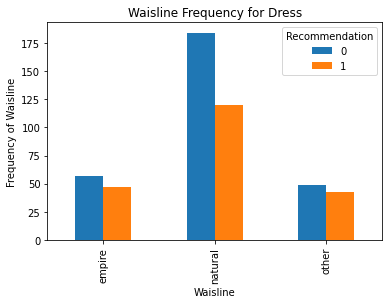

In [274]:
pd.crosstab(dress_df.waiseline,dress_df.Recommendation).plot(kind='bar')
plt.title('Waisline Frequency for Dress')
plt.xlabel('Waisline')
plt.ylabel('Frequency of Waisline')



In [275]:
##  EDA for  Neckline
freqs=dress_df.NeckLine.value_counts(dropna=False)
selected_cats=freqs.index[freqs<50]
for cat in selected_cats:
        dress_df.loc[dress_df.NeckLine== cat,'NeckLine'] = 'other'
dress_df.NeckLine.fillna(dress_df.NeckLine.value_counts().index[0],inplace=True)        
dress_df.NeckLine.value_counts(dropna=False)

o-neck    274
v-neck    124
other     102
Name: NeckLine, dtype: int64

<AxesSubplot:label='49f7580e-9d19-42bd-aabf-4735313c0631'>

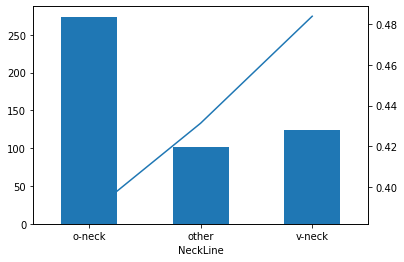

In [276]:
ax = dress_df.groupby(['NeckLine']).Recommendation.count().plot(kind='bar')
dress_df.groupby(['NeckLine']).apply(lambda x: x.Recommendation.sum()/x.Recommendation.count()).plot(kind='line',secondary_y = True, ax = ax)
## Recommendation are high for V-Neck

In [277]:
## EDA for Season
dress_df.loc[dress_df.Season== 'winter','Season'] = 'Winter'
dress_df.loc[dress_df.Season== 'Automn','Season'] = 'Autumn'
dress_df.loc[dress_df.Season== 'spring','Season'] = 'Spring'
dress_df.loc[dress_df.Season== 'summer','Season'] = 'Summer'
dress_df.Season.fillna(dress_df.Season.value_counts().index[0],inplace=True)
dress_df.Season.value_counts(dropna=False)

Summer    162
Winter    145
Spring    124
Autumn     69
Name: Season, dtype: int64

<AxesSubplot:label='d4ebedb5-3659-4e2d-a416-4c57339b5cd5'>

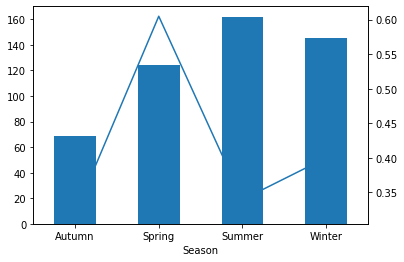

In [278]:
ax = dress_df.groupby(['Season']).Recommendation.count().plot(kind='bar')
dress_df.groupby(['Season']).apply(lambda x: x.Recommendation.sum()/x.Recommendation.count()).plot(kind='line',secondary_y = True, ax = ax)
## Recommendation are high for Spring Season

Text(0, 0.5, 'Proportion of Dresses')

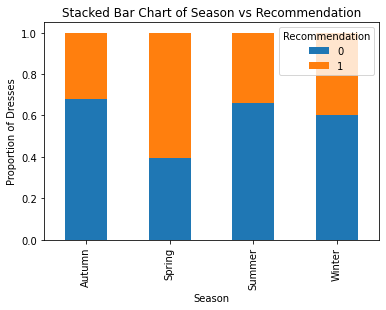

In [279]:
table=pd.crosstab(dress_df.Season,dress_df.Recommendation)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Season vs Recommendation')
plt.xlabel('Season')
plt.ylabel('Proportion of Dresses')
##  Could be a good predictor as prop is changing

In [280]:
## EDA for Size
dress_df.loc[dress_df.Size== 's','Size'] = 'S'
dress_df.loc[dress_df.Size=='small','Size'] = 'S'
dress_df.loc[dress_df.Size=='XL','Size'] = 'free'

dress_df.Size.value_counts(dropna=False)

free    188
M       177
L        96
S        39
Name: Size, dtype: int64

<AxesSubplot:label='b5581299-6939-41d4-b375-747232be216b'>

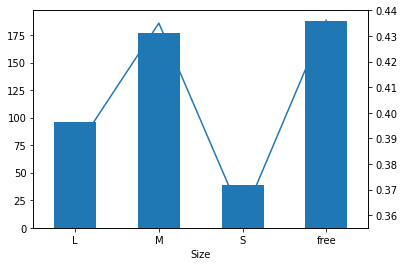

In [281]:
ax = dress_df.groupby(['Size']).Recommendation.count().plot(kind='bar')
dress_df.groupby(['Size']).apply(lambda x: x.Recommendation.sum()/x.Recommendation.count()).plot(kind='line',secondary_y = True, ax = ax)
## Recommendation are high for Medium and Free Size

Text(0, 0.5, 'Proportion of Dresses')

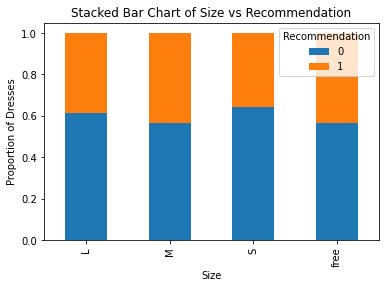

In [282]:
table=pd.crosstab(dress_df.Size,dress_df.Recommendation)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Size vs Recommendation')
plt.xlabel('Size')
plt.ylabel('Proportion of Dresses')
##  Not a good predictor as prop is same

In [283]:
## EDA for Style
dress_df.loc[dress_df.Style== 'sexy','Style'] = 'Sexy'
dress_df.loc[dress_df.Style=='Brief','Style'] = 'Sexy'
dress_df.loc[dress_df.Style=='Novelty','Style'] = 'cute'
dress_df.loc[dress_df.Style=='bohemian','Style'] = 'cute'
dress_df.loc[dress_df.Style=='OL','Style'] = 'vintage'
dress_df.loc[dress_df.Style=='fashion','Style'] = 'party'
dress_df.loc[dress_df.Style=='Flare','Style'] = 'party'
dress_df.Style.value_counts(dropna=False)

Casual     232
Sexy        94
cute        77
party       54
vintage     26
work        17
Name: Style, dtype: int64

<AxesSubplot:label='a5256d6d-4561-49cf-aa4c-6c3c7bba88f8'>

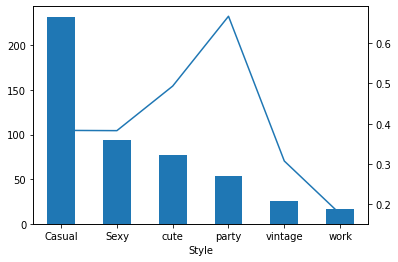

In [284]:
ax = dress_df.groupby(['Style']).Recommendation.count().plot(kind='bar')
dress_df.groupby(['Style']).apply(lambda x: x.Recommendation.sum()/x.Recommendation.count()).plot(kind='line',secondary_y = True, ax = ax)
## Recommendation are high for PartyStyle

Text(0, 0.5, 'Proportion of Dresses')

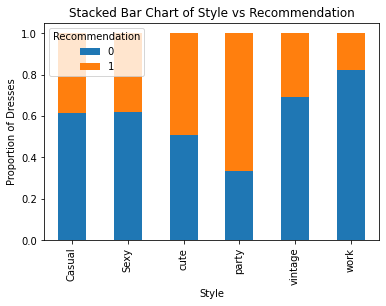

In [285]:
table=pd.crosstab(dress_df.Style,dress_df.Recommendation)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Style vs Recommendation')
plt.xlabel('Style')
plt.ylabel('Proportion of Dresses')


Text(0, 0.5, 'Frequency of Style')

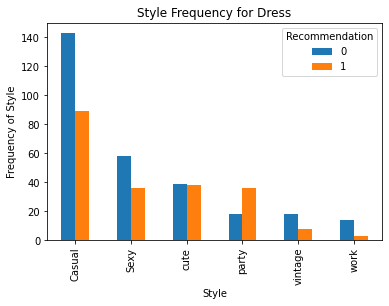

In [286]:
pd.crosstab(dress_df.Style,dress_df.Recommendation).plot(kind='bar')
plt.title('Style Frequency for Dress')
plt.xlabel('Style')
plt.ylabel('Frequency of Style')


In [287]:

## EDA for Sleevlength
dress_df.loc[dress_df.SleeveLength== 'sleeveless','SleeveLength'] = 'sleevless'
dress_df.loc[dress_df.SleeveLength== 'sleeevless','SleeveLength'] = 'sleevless'
dress_df.loc[dress_df.SleeveLength== 'sleveless','SleeveLength'] = 'sleevless'
dress_df.loc[dress_df.SleeveLength== 'threequarter','SleeveLength'] = 'short'
dress_df.loc[dress_df.SleeveLength== 'thressqatar','SleeveLength'] = 'short'
dress_df.loc[dress_df.SleeveLength== 'threequater','SleeveLength'] = 'short'
dress_df.loc[dress_df.SleeveLength== 'capsleeves','SleeveLength'] = 'short'
dress_df.loc[dress_df.SleeveLength== 'cap-sleeves','SleeveLength'] = 'short'
dress_df.loc[dress_df.SleeveLength== 'half','SleeveLength'] = 'short'
dress_df.loc[dress_df.SleeveLength== 'halfsleeve','SleeveLength'] = 'short'
dress_df.loc[dress_df.SleeveLength== 'turndowncollor','SleeveLength'] = 'short'
dress_df.loc[dress_df.SleeveLength== 'butterfly','SleeveLength'] = 'short'
dress_df.loc[dress_df.SleeveLength== 'Petal','SleeveLength'] = 'short'
dress_df.loc[dress_df.SleeveLength== 'urndowncollor','SleeveLength'] = 'short'
dress_df.SleeveLength.fillna(dress_df.SleeveLength.value_counts().index[0],inplace=True)

dress_df.SleeveLength.value_counts(dropna=False)

sleevless    234
short        169
full          97
Name: SleeveLength, dtype: int64

Text(0, 0.5, 'Proportion of Dresses')

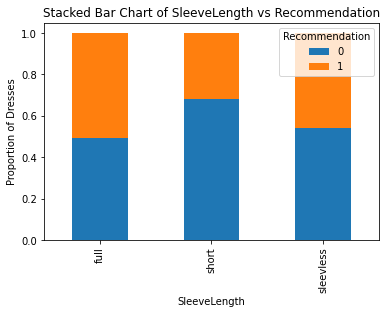

In [288]:
table=pd.crosstab(dress_df.SleeveLength,dress_df.Recommendation)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of SleeveLength vs Recommendation')
plt.xlabel('SleeveLength')
plt.ylabel('Proportion of Dresses')
##  Could be a good predictor as prop is changing

In [289]:
dress_df_copy=dress_df.copy()

## Feature Selection

In [290]:
import scipy.stats as stats
from scipy.stats import chi2_contingency

In [291]:
## USING CHAID for Independnence
def chaid_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2, p, dof, ex = chi2_contingency(confusion_matrix)
    return chi2,p

cat_cols=['Style', 'Price', 'Size', 'Season', 'NeckLine','SleeveLength', 'waiseline', 'Material','Pattern Type','Rating_bin']
for col in cat_cols:
    ch2,p=chaid_v(dress_df[col],dress_df['Recommendation'])
    print('CHAID coefficient and P-value beween %s and %s: %.3f and %.2f' %(col,'Recommendation', ch2,p))
## There is good asscociation of catogorical variables-  Style, Price, Season, SleeveLength and Material with traget variable - Recommendation

CHAID coefficient and P-value beween Style and Recommendation: 22.470 and 0.00
CHAID coefficient and P-value beween Price and Recommendation: 13.525 and 0.00
CHAID coefficient and P-value beween Size and Recommendation: 1.433 and 0.70
CHAID coefficient and P-value beween Season and Recommendation: 24.837 and 0.00
CHAID coefficient and P-value beween NeckLine and Recommendation: 3.366 and 0.19
CHAID coefficient and P-value beween SleeveLength and Recommendation: 11.225 and 0.00
CHAID coefficient and P-value beween waiseline and Recommendation: 2.080 and 0.35
CHAID coefficient and P-value beween Material and Recommendation: 6.432 and 0.04
CHAID coefficient and P-value beween Pattern Type and Recommendation: 4.665 and 0.20
CHAID coefficient and P-value beween Rating_bin and Recommendation: 2.397 and 0.30


In [292]:

## Calculating Cramer Correlation between Categorical Variables
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [293]:
cat_cols=['Style', 'Price', 'Size', 'Season', 'NeckLine','SleeveLength', 'waiseline', 'Material','Pattern Type','Rating_bin']
for col in cat_cols:
    cr=cramers_v(dress_df[col],dress_df['Recommendation'])
    print('Cramers coefficient beween %s and %s: %.3f' %(col,'Recommendation', cr))
## There is very slight correlation with catogorical variables with target variable - Recommendation

Cramers coefficient beween Style and Recommendation: 0.187
Cramers coefficient beween Price and Recommendation: 0.145
Cramers coefficient beween Size and Recommendation: 0.000
Cramers coefficient beween Season and Recommendation: 0.209
Cramers coefficient beween NeckLine and Recommendation: 0.052
Cramers coefficient beween SleeveLength and Recommendation: 0.136
Cramers coefficient beween waiseline and Recommendation: 0.012
Cramers coefficient beween Material and Recommendation: 0.094
Cramers coefficient beween Pattern Type and Recommendation: 0.058
Cramers coefficient beween Rating_bin and Recommendation: 0.028


## Creating Dummy Variables

In [501]:
#dress_df_copy=dress_df.copy()
dress_df=dress_df_copy.copy()
dress_df.shape

(500, 13)

In [502]:
#dress_df_copy=dress_df.copy()
dress_df=dress_df_copy.copy()
dress_df.shape
final_vars = ['Style', 'Price', 'Season', 'SleeveLength','Material','Rating']
#num_vars=['Rating']
target_var=['Recommendation']
dress_df=dress_df[final_vars+target_var]
#dress_df=dress_df[final_vars+num_vars+target_var]
dress_df.shape
for var in final_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(dress_df[var], prefix=var)
    data1=dress_df.join(cat_list)
    dress_df=data1

data_vars=dress_df.columns.values.tolist()
to_keep=[i for i in data_vars if i not in final_vars]

## final columns
data_final=dress_df[to_keep]
data_final.columns.values

array(['Recommendation', 'Style_Casual', 'Style_Sexy', 'Style_cute',
       'Style_party', 'Style_vintage', 'Style_work', 'Price_Average',
       'Price_High', 'Price_Low', 'Price_Medium', 'Season_Autumn',
       'Season_Spring', 'Season_Summer', 'Season_Winter',
       'SleeveLength_full', 'SleeveLength_short',
       'SleeveLength_sleevless', 'Material_cotton', 'Material_other',
       'Material_polyster', 'Rating_0.0', 'Rating_1.0', 'Rating_3.0',
       'Rating_3.5', 'Rating_3.6', 'Rating_3.7', 'Rating_4.0',
       'Rating_4.1', 'Rating_4.2', 'Rating_4.3', 'Rating_4.4',
       'Rating_4.5', 'Rating_4.6', 'Rating_4.7', 'Rating_4.8',
       'Rating_4.9', 'Rating_5.0'], dtype=object)

In [503]:
from sklearn.model_selection import train_test_split

In [504]:
## checking the Balance 
dress_df.Recommendation.value_counts(normalize=True)
## As the  values are near 50% , its a balanced dataset- No need for balancing
## Splitting the data into Train and Tes
X_train, X_test, y_train, y_test = train_test_split(data_final.drop(columns=target_var), data_final[target_var], test_size=0.3, random_state=0)
X_train.shape,X_test.shape

((350, 37), (150, 37))

In [505]:
## Running RFE for final Feature selection 

data_final_vars=data_final.columns.values.tolist()
y=target_var
X=[i for i in data_final_vars if i not in y]
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
logreg = LogisticRegression()
rftree=RandomForestClassifier()
xgb=XGBClassifier()

rfe = RFE(logreg, 20)
rfe = rfe.fit(X_train, y_train.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[False False  True  True  True  True False False False  True  True  True
 False False  True  True False False False  True  True  True False  True
  True False  True False  True False  True  True  True False False False
  True]
[16  7  1  1  1  1  4  9 10  1  1  1  2 12  1  1 11  6  5  1  1  1 18  1
  1  8  1  3  1 17  1  1  1 13 15 14  1]


In [506]:
sel_fets= X_train.columns[rfe.support_]
X=X_train[sel_fets]
X.shape
y=y_train
y.shape
X.columns

Index(['Style_cute', 'Style_party', 'Style_vintage', 'Style_work',
       'Price_Medium', 'Season_Autumn', 'Season_Spring', 'SleeveLength_full',
       'SleeveLength_short', 'Material_polyster', 'Rating_0.0', 'Rating_1.0',
       'Rating_3.5', 'Rating_3.6', 'Rating_4.0', 'Rating_4.2', 'Rating_4.4',
       'Rating_4.5', 'Rating_4.6', 'Rating_5.0'],
      dtype='object')

## Implementing the Logistic Regression

In [507]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X, y)

LogisticRegression()

In [508]:
## Predicting on Test
X_test=X_test[sel_fets]
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))


Accuracy of logistic regression classifier on test set: 0.65


In [509]:
## Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
# The result is telling us that we have 69+28 correct predictions and 33+20 incorrect predictions.

[[70 19]
 [33 28]]


In [510]:
## Compute precision, recall, F-measure and support
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.79      0.73        89
           1       0.60      0.46      0.52        61

    accuracy                           0.65       150
   macro avg       0.64      0.62      0.62       150
weighted avg       0.65      0.65      0.64       150



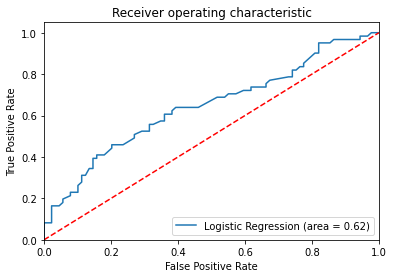

In [511]:
## ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

## XGBOOST

In [512]:
# xgb_params = {  
#                 "learning_rate":[0.01,0.05,0.1,0.3,0.5],
#                 "gamma":[i/10.0 for i in range(0,5)],
#                 "max_depth": [2,3,4,5,6,7,8],
#                 "min_child_weight":[1,2,5,10],
#                 "max_delta_step":[0,1,2,5,10],
#                 "subsample":[i/10.0 for i in range(5,10)],
#                 "colsample_bytree":[i/10.0 for i in range(5,10)],
#                 "colsample_bylevel":[i/10.0 for i in range(5,10)],
#                 "reg_lambda":[1e-5, 1e-2, 0.1, 1, 100], 
#                 "reg_alpha":[1e-5, 1e-2, 0.1, 1, 100],
#                 "scale_pos_weight":[1,2,3,4,5,6,7,8,9],
#                 "n_estimators":[100,500,700,1000]
#              }
# xgb=XGBClassifier(objective='binary:logistic')
# n_iter=10

# random_search=RandomizedSearchCV(xgb,n_jobs=-1,cv=3,n_iter=n_iter,scoring='roc_auc',
#                                  param_distributions=xgb_params)
# random_search.fit(X_train,y_train)
# def report(results, n_top=3):
#     for i in range(1, n_top + 1):
#         candidates = np.flatnonzero(results['rank_test_score'] == i)
#         for candidate in candidates:
#             print("Model with rank: {0}".format(i))
#             print("Mean validation score: {0:.3f} (std: {1:.5f})".format(
#                   results['mean_test_score'][candidate],
#                   results['std_test_score'][candidate]))
#             print("Parameters: {0}".format(results['params'][candidate]))
#             print("")
# report(random_search.cv_results_,5)

In [513]:

# fit model no training data
#model_xgb = random_search.best_estimator_
model_xgb = XGBClassifier()
model_xgb.fit(X, y_train)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [514]:
##Predict the response for test dataset
X_test=X_test[sel_fets]
y_pred = model_xgb.predict(X_test)


<AxesSubplot:>

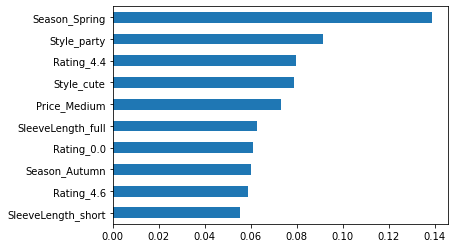

In [515]:
feat_imp_df=pd.DataFrame({'importance':model_xgb.feature_importances_},index=X.columns)

#print(feat_imp_df.sort_values('importance',ascending=False))

feat_imp_df.importance.nlargest(10).sort_values(ascending=True).plot(kind='barh')

In [516]:
## Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
# The result is telling us that we have 61+29 correct predictions and 32+28 incorrect predictions.

## Compute precision, recall, F-measure and support
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

[[74 15]
 [36 25]]
              precision    recall  f1-score   support

           0       0.67      0.83      0.74        89
           1       0.62      0.41      0.50        61

    accuracy                           0.66       150
   macro avg       0.65      0.62      0.62       150
weighted avg       0.65      0.66      0.64       150



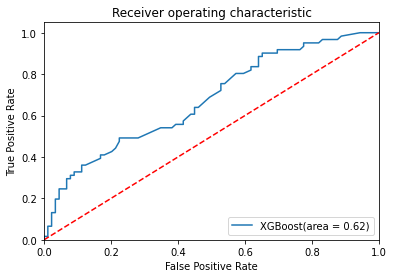

In [517]:
## ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, model_xgb.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model_xgb.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGBoost(area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

## Implementing DECISION TREE

In [518]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier

In [519]:
params = { 'class_weight':[None,'balanced'],
        'criterion':['entropy','gini'],
        'max_depth': [None,5,10,15,20,25],
        'min_samples_leaf': [1,2,5,10,15,20],
        'min_samples_split':[2,5,10,15,20]
}

In [520]:
## Using Random Search to for Hyperparameter tuning
clf =DecisionTreeClassifier()
random_search = RandomizedSearchCV(clf,cv=10,
                                  param_distributions=params,
                                  scoring='roc_auc',
                                   n_iter=10,n_jobs=1,verbose=20)

In [521]:
random_search.fit(X,y)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] min_samples_split=5, min_samples_leaf=2, max_depth=5, criterion=entropy, class_weight=balanced 
[CV]  min_samples_split=5, min_samples_leaf=2, max_depth=5, criterion=entropy, class_weight=balanced, score=0.777, total=   0.0s
[CV] min_samples_split=5, min_samples_leaf=2, max_depth=5, criterion=entropy, class_weight=balanced 
[CV]  min_samples_split=5, min_samples_leaf=2, max_depth=5, criterion=entropy, class_weight=balanced, score=0.495, total=   0.0s
[CV] min_samples_split=5, min_samples_leaf=2, max_depth=5, criterion=entropy, class_weight=balanced 
[CV]  min_samples_split=5, min_samples_leaf=2, max_depth=5, criterion=entropy, class_weight=balanced, score=0.695, total=   0.0s
[CV] min_samples_split=5, min_samples_leaf=2, max_depth=5, criterion=entropy, class_weight=balanced 
[CV]  min_samples_split=5, min_samples_leaf=2, max_depth=5, criterion=entropy, class_weight=balanced, score=0.503, total=   0.0s
[CV] min_samples_

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  


[CV] min_samples_split=5, min_samples_leaf=15, max_depth=5, criterion=gini, class_weight=balanced 
[CV]  min_samples_split=5, min_samples_leaf=15, max_depth=5, criterion=gini, class_weight=balanced, score=0.607, total=   0.0s
[CV] min_samples_split=5, min_samples_leaf=20, max_depth=15, criterion=gini, class_weight=balanced 
[CV]  min_samples_split=5, min_samples_leaf=20, max_depth=15, criterion=gini, class_weight=balanced, score=0.803, total=   0.0s
[CV] min_samples_split=5, min_samples_leaf=20, max_depth=15, criterion=gini, class_weight=balanced 
[CV]  min_samples_split=5, min_samples_leaf=20, max_depth=15, criterion=gini, class_weight=balanced, score=0.607, total=   0.0s
[CV] min_samples_split=5, min_samples_leaf=20, max_depth=15, criterion=gini, class_weight=balanced 
[CV]  min_samples_split=5, min_samples_leaf=20, max_depth=15, criterion=gini, class_weight=balanced, score=0.742, total=   0.0s
[CV] min_samples_split=5, min_samples_leaf=20, max_depth=15, criterion=gini, class_weight

[CV]  min_samples_split=20, min_samples_leaf=10, max_depth=20, criterion=gini, class_weight=balanced, score=0.675, total=   0.0s
[CV] min_samples_split=20, min_samples_leaf=10, max_depth=20, criterion=gini, class_weight=balanced 
[CV]  min_samples_split=20, min_samples_leaf=10, max_depth=20, criterion=gini, class_weight=balanced, score=0.727, total=   0.0s
[CV] min_samples_split=20, min_samples_leaf=10, max_depth=20, criterion=gini, class_weight=balanced 
[CV]  min_samples_split=20, min_samples_leaf=10, max_depth=20, criterion=gini, class_weight=balanced, score=0.590, total=   0.0s
[CV] min_samples_split=20, min_samples_leaf=10, max_depth=20, criterion=gini, class_weight=balanced 
[CV]  min_samples_split=20, min_samples_leaf=10, max_depth=20, criterion=gini, class_weight=balanced, score=0.728, total=   0.0s
[CV] min_samples_split=20, min_samples_leaf=10, max_depth=20, criterion=gini, class_weight=balanced 
[CV]  min_samples_split=20, min_samples_leaf=10, max_depth=20, criterion=gini, c

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.5s finished


RandomizedSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=1,
                   param_distributions={'class_weight': [None, 'balanced'],
                                        'criterion': ['entropy', 'gini'],
                                        'max_depth': [None, 5, 10, 15, 20, 25],
                                        'min_samples_leaf': [1, 2, 5, 10, 15,
                                                             20],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              20]},
                   scoring='roc_auc', verbose=20)

In [522]:
dtree=random_search.best_estimator_

In [523]:
# Train Decision Tree Classifer
dtree = dtree.fit(X,y)

#Predict the response for test dataset
X_test=X_test[sel_fets]
y_pred = dtree.predict(X_test)

In [524]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.66


In [525]:
## Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
# The result is telling us that we have 69+28 correct predictions and 33+26 incorrect predictions.

[[79 10]
 [41 20]]


In [527]:
## Compute precision, recall, F-measure and support
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.89      0.76        89
           1       0.67      0.33      0.44        61

    accuracy                           0.66       150
   macro avg       0.66      0.61      0.60       150
weighted avg       0.66      0.66      0.63       150



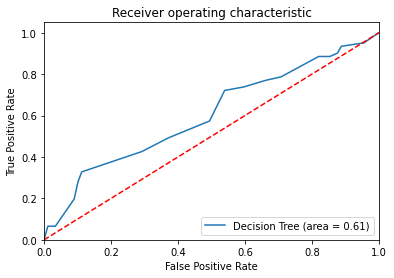

In [530]:
## ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, dtree.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, dtree.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

<AxesSubplot:>

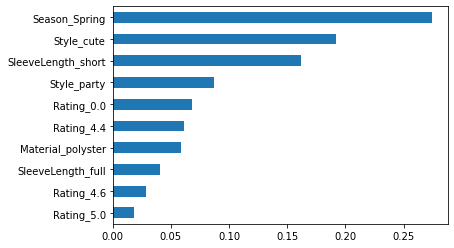

In [531]:
feat_imp_df=pd.DataFrame({'importance':dtree.feature_importances_},index=X.columns)

#print(feat_imp_df.sort_values('importance',ascending=False))

feat_imp_df.importance.nlargest(10).sort_values(ascending=True).plot(kind='barh')

## Implementing Random Forest

In [532]:
from sklearn.ensemble import RandomForestClassifier

In [533]:
params = { 'n_estimators': [100,200,300,500,700,1000],
          'max_features': [5,10,15,20],
          "bootstrap":[True,False],
         'class_weight':[None,'balanced'],
        'criterion':['entropy','gini'],
        'max_depth': [None,5,10,15,20,25],
        'min_samples_leaf': [1,2,5,10,15,20],
        'min_samples_split':[2,5,10,15,20]
}

In [534]:
## Using Random Search to for Hyperparameter tuning
clf=RandomForestClassifier()
random_search = RandomizedSearchCV(clf,cv=10,
                                  param_distributions=params,
                                  scoring='roc_auc',
                                   n_iter=10,n_jobs=1,verbose=20)

In [535]:
n_iter_search=25 # a better choice is 50 or 60
random_forest_search = RandomizedSearchCV(clf,cv=5,
                                  param_distributions=params,
                                  scoring='roc_auc',
                                   n_iter=10,n_jobs=1,verbose=20)

In [536]:
random_forest_search.fit(X,y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=20, max_features=20, max_depth=10, criterion=entropy, class_weight=balanced, bootstrap=False 
[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=20, max_features=20, max_depth=10, criterion=entropy, class_weight=balanced, bootstrap=False, score=0.676, total=   0.1s
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=20, max_features=20, max_depth=10, criterion=entropy, class_weight=balanced, bootstrap=False 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=20, max_features=20, max_depth=10, criterion=entropy, class_weight=balanced, bootstrap=False, score=0.626, total=   0.1s
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=20, max_features=20, max_depth=10, criterion=entropy, class_weight=balanced, bootstrap=False 
[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=20, max_features=20, max_depth=10, criterion=entropy, class_weight=balanced, bootstrap=False, score=0.672, total=   0.1s
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=20, max_features=20, max_depth=10, criterion=entropy, class_weight=balanced, bootstrap=False 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s remaining:    0.0s


[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=20, max_features=20, max_depth=10, criterion=entropy, class_weight=balanced, bootstrap=False, score=0.654, total=   0.1s
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=20, max_features=20, max_depth=10, criterion=entropy, class_weight=balanced, bootstrap=False 
[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=20, max_features=20, max_depth=10, criterion=entropy, class_weight=balanced, bootstrap=False, score=0.671, total=   0.1s
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=1, max_features=20, max_depth=15, criterion=gini, class_weight=None, bootstrap=True 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.6s remaining:    0.0s


[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=1, max_features=20, max_depth=15, criterion=gini, class_weight=None, bootstrap=True, score=0.659, total=   0.2s
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=1, max_features=20, max_depth=15, criterion=gini, class_weight=None, bootstrap=True 
[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=1, max_features=20, max_depth=15, criterion=gini, class_weight=None, bootstrap=True, score=0.550, total=   0.2s
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=1, max_features=20, max_depth=15, criterion=gini, class_weight=None, bootstrap=True 


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.9s remaining:    0.0s


[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=1, max_features=20, max_depth=15, criterion=gini, class_weight=None, bootstrap=True, score=0.634, total=   0.2s
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=1, max_features=20, max_depth=15, criterion=gini, class_weight=None, bootstrap=True 
[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=1, max_features=20, max_depth=15, criterion=gini, class_weight=None, bootstrap=True, score=0.562, total=   0.2s
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=1, max_features=20, max_depth=15, criterion=gini, class_weight=None, bootstrap=True 


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    1.2s remaining:    0.0s


[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=1, max_features=20, max_depth=15, criterion=gini, class_weight=None, bootstrap=True, score=0.649, total=   0.2s
[CV] n_estimators=300, min_samples_split=5, min_samples_leaf=5, max_features=15, max_depth=10, criterion=gini, class_weight=balanced, bootstrap=True 


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.3s remaining:    0.0s


[CV]  n_estimators=300, min_samples_split=5, min_samples_leaf=5, max_features=15, max_depth=10, criterion=gini, class_weight=balanced, bootstrap=True, score=0.682, total=   0.2s
[CV] n_estimators=300, min_samples_split=5, min_samples_leaf=5, max_features=15, max_depth=10, criterion=gini, class_weight=balanced, bootstrap=True 
[CV]  n_estimators=300, min_samples_split=5, min_samples_leaf=5, max_features=15, max_depth=10, criterion=gini, class_weight=balanced, bootstrap=True, score=0.598, total=   0.2s
[CV] n_estimators=300, min_samples_split=5, min_samples_leaf=5, max_features=15, max_depth=10, criterion=gini, class_weight=balanced, bootstrap=True 


[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    1.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    1.8s remaining:    0.0s


[CV]  n_estimators=300, min_samples_split=5, min_samples_leaf=5, max_features=15, max_depth=10, criterion=gini, class_weight=balanced, bootstrap=True, score=0.663, total=   0.2s
[CV] n_estimators=300, min_samples_split=5, min_samples_leaf=5, max_features=15, max_depth=10, criterion=gini, class_weight=balanced, bootstrap=True 
[CV]  n_estimators=300, min_samples_split=5, min_samples_leaf=5, max_features=15, max_depth=10, criterion=gini, class_weight=balanced, bootstrap=True, score=0.687, total=   0.2s
[CV] n_estimators=300, min_samples_split=5, min_samples_leaf=5, max_features=15, max_depth=10, criterion=gini, class_weight=balanced, bootstrap=True 


[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    2.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    2.2s remaining:    0.0s


[CV]  n_estimators=300, min_samples_split=5, min_samples_leaf=5, max_features=15, max_depth=10, criterion=gini, class_weight=balanced, bootstrap=True, score=0.708, total=   0.2s
[CV] n_estimators=700, min_samples_split=5, min_samples_leaf=10, max_features=5, max_depth=10, criterion=gini, class_weight=balanced, bootstrap=True 


[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    2.4s remaining:    0.0s


[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=10, max_features=5, max_depth=10, criterion=gini, class_weight=balanced, bootstrap=True, score=0.704, total=   0.4s
[CV] n_estimators=700, min_samples_split=5, min_samples_leaf=10, max_features=5, max_depth=10, criterion=gini, class_weight=balanced, bootstrap=True 


[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    2.8s remaining:    0.0s


[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=10, max_features=5, max_depth=10, criterion=gini, class_weight=balanced, bootstrap=True, score=0.635, total=   0.4s
[CV] n_estimators=700, min_samples_split=5, min_samples_leaf=10, max_features=5, max_depth=10, criterion=gini, class_weight=balanced, bootstrap=True 


[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    3.2s remaining:    0.0s


[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=10, max_features=5, max_depth=10, criterion=gini, class_weight=balanced, bootstrap=True, score=0.645, total=   0.4s
[CV] n_estimators=700, min_samples_split=5, min_samples_leaf=10, max_features=5, max_depth=10, criterion=gini, class_weight=balanced, bootstrap=True 


[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    3.7s remaining:    0.0s


[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=10, max_features=5, max_depth=10, criterion=gini, class_weight=balanced, bootstrap=True, score=0.648, total=   0.4s
[CV] n_estimators=700, min_samples_split=5, min_samples_leaf=10, max_features=5, max_depth=10, criterion=gini, class_weight=balanced, bootstrap=True 


[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    4.1s remaining:    0.0s


[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=10, max_features=5, max_depth=10, criterion=gini, class_weight=balanced, bootstrap=True, score=0.716, total=   0.4s
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=20, max_features=5, max_depth=15, criterion=gini, class_weight=balanced, bootstrap=False 
[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=20, max_features=5, max_depth=15, criterion=gini, class_weight=balanced, bootstrap=False, score=0.689, total=   0.2s
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=20, max_features=5, max_depth=15, criterion=gini, class_weight=balanced, bootstrap=False 
[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=20, max_features=5, max_depth=15, criterion=gini, class_weight=balanced, bootstrap=False, score=0.654, total=   0.2s
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=20, max_features=5, max_depth=15, criterion=gini, class_weight=balanced, bootstrap=False 
[CV]  

[CV]  n_estimators=200, min_samples_split=20, min_samples_leaf=5, max_features=15, max_depth=None, criterion=entropy, class_weight=balanced, bootstrap=False, score=0.670, total=   0.1s
[CV] n_estimators=200, min_samples_split=15, min_samples_leaf=10, max_features=15, max_depth=15, criterion=gini, class_weight=balanced, bootstrap=True 
[CV]  n_estimators=200, min_samples_split=15, min_samples_leaf=10, max_features=15, max_depth=15, criterion=gini, class_weight=balanced, bootstrap=True, score=0.703, total=   0.1s
[CV] n_estimators=200, min_samples_split=15, min_samples_leaf=10, max_features=15, max_depth=15, criterion=gini, class_weight=balanced, bootstrap=True 
[CV]  n_estimators=200, min_samples_split=15, min_samples_leaf=10, max_features=15, max_depth=15, criterion=gini, class_weight=balanced, bootstrap=True, score=0.620, total=   0.1s
[CV] n_estimators=200, min_samples_split=15, min_samples_leaf=10, max_features=15, max_depth=15, criterion=gini, class_weight=balanced, bootstrap=True 

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   10.2s finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=1,
                   param_distributions={'bootstrap': [True, False],
                                        'class_weight': [None, 'balanced'],
                                        'criterion': ['entropy', 'gini'],
                                        'max_depth': [None, 5, 10, 15, 20, 25],
                                        'max_features': [5, 10, 15, 20],
                                        'min_samples_leaf': [1, 2, 5, 10, 15,
                                                             20],
                                        'min_samples_split': [2, 5, 10, 15, 20],
                                        'n_estimators': [100, 200, 300, 500,
                                                         700, 1000]},
                   scoring='roc_auc', verbose=20)

In [538]:
rftree=random_forest_search.best_estimator_
rftree

RandomForestClassifier(class_weight='balanced', max_depth=10, max_features=5,
                       min_samples_leaf=10, min_samples_split=5,
                       n_estimators=700)

In [539]:
# Train Decision Tree Classifer
rftree = rftree.fit(X,y)

#Predict the response for test dataset
X_test=X_test[sel_fets]
y_pred = rftree.predict(X_test)

In [541]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6133333333333333


In [543]:
## Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
# The result is telling us that we have 61+29 correct predictions and 32+28 incorrect predictions.

[[55 34]
 [24 37]]


In [544]:
## Compute precision, recall, F-measure and support
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.62      0.65        89
           1       0.52      0.61      0.56        61

    accuracy                           0.61       150
   macro avg       0.61      0.61      0.61       150
weighted avg       0.63      0.61      0.62       150



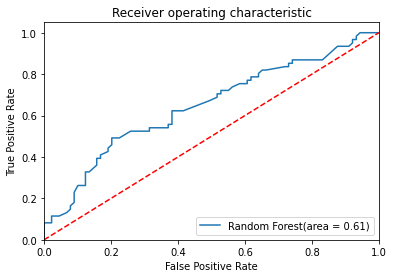

In [545]:
## ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, rftree.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, rftree.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest(area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

<AxesSubplot:>

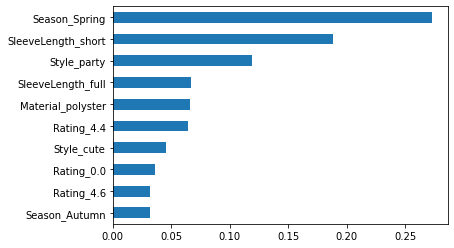

In [546]:
feat_imp_df=pd.DataFrame({'importance':rftree.feature_importances_},index=X.columns)

#print(feat_imp_df.sort_values('importance',ascending=False))

feat_imp_df.importance.nlargest(10).sort_values(ascending=True).plot(kind='barh')

## CATBOOST

In [109]:
dress_df=dress_df_copy.copy()
final_vars = ['Style', 'Price', 'Season', 'SleeveLength','Material' ,'Rating']
target_var=['Recommendation']
dress_df=dress_df[final_vars+target_var]
cat_f=dress_df.select_dtypes(include='object').columns
cat_f

Index(['Style', 'Price', 'Season', 'SleeveLength', 'Material'], dtype='object')

In [108]:
X_train, X_test, y_train, y_test = train_test_split(dress_df.drop(columns=target_var), dress_df[target_var], test_size=0.3, random_state=0)
X_train.shape,X_test.shape

((350, 6), (150, 6))

In [122]:
### Hyperparameter tuning using GRID SEARCH

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostClassifier # Or CatBoostRegressor


parameters = {'depth'         : [4,5,6,7,8],
                 'learning_rate' : [0.01,0.02,0.03,0.04],
                  'iterations'    : [50,60,70,100],
                   'class_weights':[[1,1],[1,2],[2,3],[2,5]]
                 }
CBC = CatBoostClassifier(custom_loss=['Accuracy'])
Grid_CBC = GridSearchCV(estimator=CBC, param_grid = parameters, cv = 2, n_jobs=-1)
Grid_CBC.fit(X_train, y_train,cat_features=cat_f)

print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",Grid_CBC.best_estimator_)
print("\n The best score across ALL searched params:\n",Grid_CBC.best_score_)
print("\n The best parameters across ALL searched params:\n",Grid_CBC.best_params_)



0:	learn: 0.6907441	total: 20.1ms	remaining: 1.99s
1:	learn: 0.6888613	total: 29.4ms	remaining: 1.44s
2:	learn: 0.6878552	total: 37.1ms	remaining: 1.2s
3:	learn: 0.6858577	total: 58.3ms	remaining: 1.4s
4:	learn: 0.6837480	total: 79.6ms	remaining: 1.51s
5:	learn: 0.6821566	total: 95.6ms	remaining: 1.5s
6:	learn: 0.6807128	total: 109ms	remaining: 1.44s
7:	learn: 0.6790843	total: 130ms	remaining: 1.5s
8:	learn: 0.6773740	total: 153ms	remaining: 1.55s
9:	learn: 0.6761587	total: 170ms	remaining: 1.53s
10:	learn: 0.6743774	total: 193ms	remaining: 1.56s
11:	learn: 0.6738376	total: 199ms	remaining: 1.46s
12:	learn: 0.6719880	total: 220ms	remaining: 1.47s
13:	learn: 0.6703745	total: 245ms	remaining: 1.5s
14:	learn: 0.6684311	total: 275ms	remaining: 1.56s
15:	learn: 0.6672705	total: 287ms	remaining: 1.5s
16:	learn: 0.6659077	total: 308ms	remaining: 1.5s
17:	learn: 0.6641663	total: 330ms	remaining: 1.5s
18:	learn: 0.6625595	total: 352ms	remaining: 1.5s
19:	learn: 0.6610867	total: 372ms	remaining:

In [123]:
bestparams=Grid_CBC.best_params_
model_cb = CatBoostClassifier(**bestparams)
#model_cb = CatBoostClassifier()

model_cb.fit(X_train, y_train, plot=True, cat_features=cat_f, eval_set=(X_test, y_test))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6907441	test: 0.6920379	best: 0.6920379 (0)	total: 39.2ms	remaining: 3.88s
1:	learn: 0.6888613	test: 0.6905428	best: 0.6905428 (1)	total: 52.8ms	remaining: 2.59s
2:	learn: 0.6878552	test: 0.6893430	best: 0.6893430 (2)	total: 67ms	remaining: 2.17s
3:	learn: 0.6858577	test: 0.6879855	best: 0.6879855 (3)	total: 102ms	remaining: 2.44s
4:	learn: 0.6837480	test: 0.6870106	best: 0.6870106 (4)	total: 138ms	remaining: 2.63s
5:	learn: 0.6821566	test: 0.6862719	best: 0.6862719 (5)	total: 164ms	remaining: 2.56s
6:	learn: 0.6807128	test: 0.6848588	best: 0.6848588 (6)	total: 185ms	remaining: 2.46s
7:	learn: 0.6790843	test: 0.6836711	best: 0.6836711 (7)	total: 224ms	remaining: 2.57s
8:	learn: 0.6773740	test: 0.6835039	best: 0.6835039 (8)	total: 265ms	remaining: 2.67s
9:	learn: 0.6761587	test: 0.6824420	best: 0.6824420 (9)	total: 289ms	remaining: 2.6s
10:	learn: 0.6743774	test: 0.6818010	best: 0.6818010 (10)	total: 324ms	remaining: 2.62s
11:	learn: 0.6738376	test: 0.6811396	best: 0.6811396

95:	learn: 0.6048516	test: 0.6526441	best: 0.6526441 (95)	total: 3.18s	remaining: 133ms
96:	learn: 0.6043196	test: 0.6523526	best: 0.6523526 (96)	total: 3.22s	remaining: 99.7ms
97:	learn: 0.6041265	test: 0.6521536	best: 0.6521536 (97)	total: 3.24s	remaining: 66.2ms
98:	learn: 0.6034223	test: 0.6522125	best: 0.6521536 (97)	total: 3.28s	remaining: 33.1ms
99:	learn: 0.6021617	test: 0.6522869	best: 0.6521536 (97)	total: 3.31s	remaining: 0us

bestTest = 0.6521536069
bestIteration = 97

Shrink model to first 98 iterations.


<AxesSubplot:>

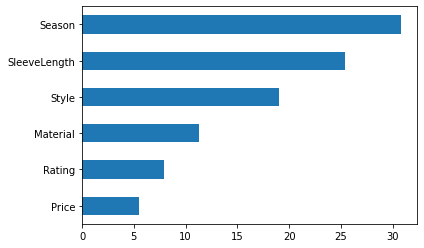

In [124]:
feat_imp_df=pd.DataFrame({'importance':model_cb.feature_importances_},index=X_train.columns)

#print(feat_imp_df.sort_values('importance',ascending=False))

feat_imp_df.importance.nlargest(10).sort_values(ascending=True).plot(kind='barh')

(array([6.000000, 18.000000, 13.000000, 28.000000, 34.000000, 10.000000,
        18.000000, 13.000000, 5.000000, 5.000000]),
 array([0.291524, 0.325746, 0.359968, 0.394190, 0.428412, 0.462633,
        0.496855, 0.531077, 0.565299, 0.599521, 0.633742]),
 <BarContainer object of 10 artists>)

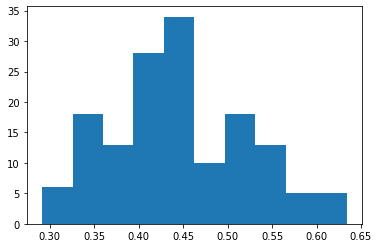

In [143]:
y_pred_proba=model_cb.predict_proba(data=X_test)[:,1]
y_hat_test = np.where(y_pred_proba > 0.5, 1, 0)
plt.hist(y_pred_proba)

In [144]:
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve, roc_auc_score, precision_score, recall_score, precision_recall_curve
from sklearn.metrics import f1_score

In [145]:
print(f'Accuracy Score: {accuracy_score(y_test,y_hat_test)}')
print(f'Area Under Curve: {roc_auc_score(y_test,y_hat_test)}') 
print(f'Recall score: {recall_score(y_test,y_hat_test)}')
print(f'Precision score: {precision_score(y_test,y_hat_test)}')
print(f'F1 score: {f1_score(y_test,y_hat_test)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test,y_hat_test)}')


Accuracy Score: 0.62
Area Under Curve: 0.579204273346841
Recall score: 0.36065573770491804
Precision score: 0.55
F1 score: 0.4356435643564357
Confusion Matrix: 
[[71 18]
 [39 22]]


Text(0.5, 1.0, 'ROC curve')

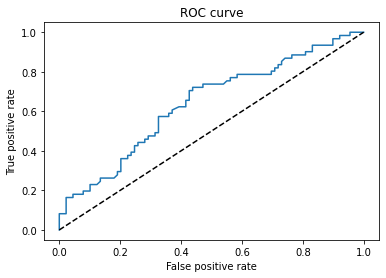

In [146]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
# Here we store each of the three arrays in a separate variable. 
plt.plot(fpr, tpr)
# We plot the false positive rate along the x-axis and the true positive rate along the y-axis,
# thus plotting the ROC curve.
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
# We plot a seconary diagonal line, with dashed line style and black color.
plt.xlabel('False positive rate')
# We name the x-axis "False positive rate".
plt.ylabel('True positive rate')
# We name the x-axis "True positive rate".
plt.title('ROC curve')
# We name the graph "ROC curve".

In [257]:
## Final Result- Logistic Regression perform better than Decesion Tree and Random Forest